## 양돈 월별 데이터 수집

In [ ]:
import mysql.connector

conn = mysql.connector.connect(
    host = 'database-1.cba44miw26by.ap-northeast-2.rds.amazonaws.com',
    port = 3306,
    user = 'kjy',
    password = '0000',
    database = 'pig'
)

cursor = conn.cursor(buffered=True)

In [58]:
import pandas as pd

raw_data = pd.read_excel('./data/pig_monthly.xlsx', header=1)
raw_data = raw_data.drop(columns=['지역'])
raw_data.head()

/home/jykim/venv/eda_venv/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,년도,규모,농장,데이터구분,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,2020,100~200,PIGGO_156,분만율,81.3,81.1,73.9,76.6,80.6,68.6,79.4,77.4,75.9,79.4,72.2,75.0
1,2019,100~200,PIGGO_156,평균이유,9.0,8.5,9.9,9.0,9.1,9.0,9.1,9.7,8.6,9.0,9.5,10.1
2,2018,100~200,PIGGO_156,임신사고(불규칙),0.0,0.0,2.0,3.0,1.0,1.0,2.0,3.0,4.0,2.0,4.0,2.0
3,2017,100~200,PIGGO_156,7일내재귀율,87.0,83.3,87.5,78.9,78.9,90.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2017,100~200,PIGGO_156,임신사고(도태),NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
cols = raw_data.columns
cols

Index(['년도', '규모', '농장', '데이터구분', '1월', '2월', '3월', '4월', '5월', '6월', '7월',
       '8월', '9월', '10월', '11월', '12월'],
      dtype='object')

In [60]:
month = cols[4:]
month

Index(['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월', '10월', '11월',
       '12월'],
      dtype='object')

In [61]:
for i in cols[4:]:
    print(i, raw_data[i].isna().sum())

1월 4624
2월 4623
3월 4612
4월 4615
5월 4611
6월 4617
7월 4606
8월 4608
9월 4588
10월 4588
11월 4588
12월 4584


In [62]:
df = raw_data[ (raw_data['데이터구분'] == '분만율') |
               (raw_data['데이터구분'] == '모돈회전율') |
               (raw_data['데이터구분'] == '평균실산') ]
df

,년도,규모,농장,데이터구분,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
0,2020,100~200,PIGGO_156,분만율,81.30,81.10,73.90,76.60,80.60,68.60,79.40,77.4,75.90,79.40,72.20,75.00
5,2016,100~200,PIGGO_156,모돈회전율,2.19,2.03,1.91,1.94,2.16,2.31,2.30,2.4,2.42,2.38,2.44,2.87
14,2023,500~1000,PIGGO_182,모돈회전율,NaN,2.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,2020,100~200,PIGGO_156,분만율,81.30,81.10,73.90,76.60,80.60,68.60,79.40,77.4,75.90,79.40,72.20,75.00
24,2016,100~200,PIGGO_156,모돈회전율,2.19,2.03,1.91,1.94,2.16,2.31,2.30,2.4,2.42,2.38,2.44,2.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12675,2020,500~1000,PIGGO_149,분만율,77.60,70.20,72.60,80.20,75.90,76.50,77.80,84.1,83.30,83.10,80.30,83.90
12699,2019,300~400,PIGGO_105,평균실산,11.40,11.00,12.20,12.20,11.90,11.30,10.00,10.7,11.50,11.30,10.80,11.00
12711,2023,200~300,PIGGO_198,모돈회전율,NaN,NaN,NaN,2.33,NaN,NaN,2.41,NaN,NaN,NaN,NaN,2.62
12765,2021,1000두 이상,PIGGO_231,평균실산,10.90,10.90,11.20,11.10,11.00,10.80,10.30,NaN,10.20,11.10,10.90,10.70


In [66]:
df_2023 = raw_data[raw_data['년도']==2023]
df_2023

,년도,규모,농장,데이터구분,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
10,2023,500~1000,PIGGO_182,임신사고(도태),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0
11,2023,500~1000,PIGGO_182,임신사고(공태),0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN
12,2023,500~1000,PIGGO_182,임신사고(불규칙),NaN,NaN,2.0,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
13,2023,500~1000,PIGGO_182,미라합계,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,2023,500~1000,PIGGO_182,모돈회전율,NaN,2.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12806,2023,500~1000,PIGGO_244,미라합계,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256.0,186.0,NaN,NaN
12836,2023,1000두 이상,PIGGO_25,임신사고(공태),NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,0.0
12837,2023,1000두 이상,PIGGO_25,임신사고(지연),NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12838,2023,1000두 이상,PIGGO_25,임신사고(불규칙),9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
df_2023['데이터구분'].unique()

array(['임신사고(도태)', '임신사고(공태)', '임신사고(불규칙)', '미라합계', '모돈회전율', '임신사고(지연)',
       '임신사고(1차)'], dtype=object)

In [69]:
df_2023_rot = df_2023[df_2023['데이터구분']=='모돈회전율']
df_pivot = pd.pivot_table(df_2023_rot, index='규모', values=month, aggfunc='mean')
df_pivot

,10월,11월,12월,2월,3월,4월,5월,6월,7월,8월,9월
규모,,,,,,,,,,,
100~200,NaN,2.435556,2.592000,2.475,1.990,2.1425,2.14,2.47,2.090000,2.36,2.100000
100두 미만,2.56000,2.565000,NaN,2.430,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200~300,2.49000,2.432727,2.558636,2.525,NaN,2.3300,1.97,2.47,2.236087,2.36,2.218421
300~400,1.99000,2.170000,2.400000,2.300,2.306,NaN,1.97,2.32,NaN,NaN,NaN
400~500,NaN,NaN,2.460000,2.300,2.390,NaN,NaN,2.46,NaN,NaN,NaN
500~1000,2.35375,2.430000,NaN,2.300,NaN,NaN,2.39,NaN,NaN,NaN,NaN


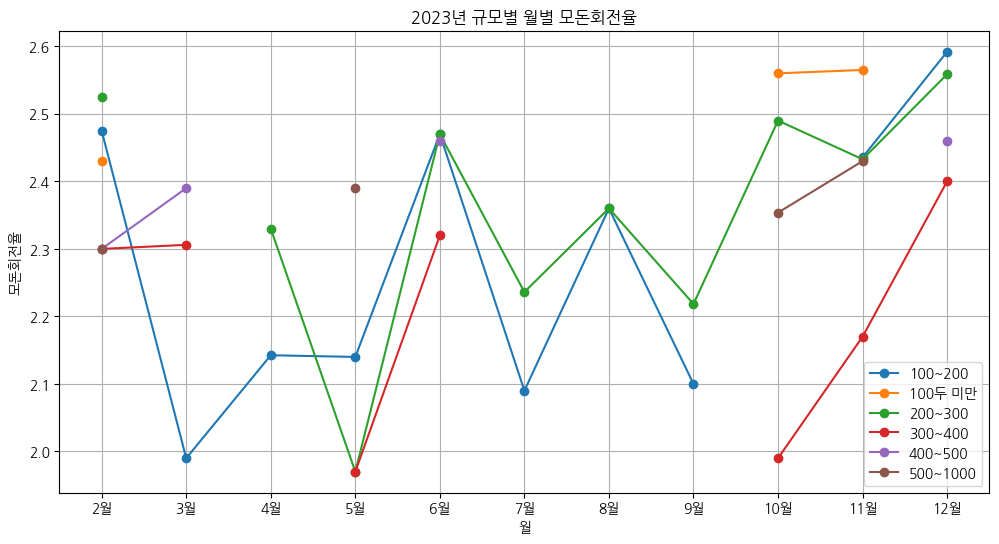

In [75]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

month_order = month[1:]

df_pivot = df_pivot[month_order]

plt.figure(figsize=(12,6))
for size in df_pivot.index.unique():
    plt.plot(df_pivot.columns, df_pivot.loc[size], marker='o', label=size)

plt.title("2023년 규모별 월별 모돈회전율")
plt.xlabel("월")
plt.ylabel("모돈회전율")
plt.legend()
plt.grid()
plt.show()



* 월별 데이터의 경우, 결측이 너무 많고, 모든 연도의 데이터를 가지고 있지 않음

## 양돈 연도별 데이터 수집

In [84]:
import pandas as pd

raw_data = pd.read_excel('./data/pig_yearly.xlsx', header=1)
raw_data = raw_data.drop(columns=['지역', '농장'])
raw_data.head()

/home/jykim/venv/eda_venv/lib/python3.10/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,년도,규모,상시모돈수(두),MSY(두),PSY(두),모돈회전율(회전),평균비생산일수(일),평균총산(두),평균실산(두),평균이유(두),분만율(%),초교배일령(일),임신기간(일),포유기간(일),재귀발정일(일)
0,2019,100~200,143.7,17.2,19.7,2.13,74.6,13.0,11.0,9.0,65.4,256.7,115.9,20.4,7.7
1,2021,500~1000,523.4,16.2,24.9,2.28,45.6,14.0,12.0,11.0,82.4,261.1,115.0,26.8,7.7
2,2018,100~200,146.1,19.2,21.7,2.18,69.4,13.0,12.0,10.0,76.3,263.1,116.0,20.2,12.9
3,2021,500~1000,636.9,NaN,29.2,2.52,25.3,14.0,12.0,12.0,90.5,268.5,115.5,23.6,7.9
4,2021,400~500,453.6,NaN,30.9,2.29,43.9,16.0,14.0,14.0,81.5,232.3,114.3,27.1,8.4


In [85]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   년도          905 non-null    int64  
 1   규모          904 non-null    object 
 2   상시모돈수(두)    904 non-null    float64
 3   MSY(두)      182 non-null    float64
 4   PSY(두)      887 non-null    float64
 5   모돈회전율(회전)   887 non-null    float64
 6   평균비생산일수(일)  887 non-null    float64
 7   평균총산(두)     887 non-null    float64
 8   평균실산(두)     887 non-null    float64
 9   평균이유(두)     887 non-null    float64
 10  분만율(%)      887 non-null    float64
 11  초교배일령(일)    883 non-null    float64
 12  임신기간(일)     887 non-null    float64
 13  포유기간(일)     887 non-null    float64
 14  재귀발정일(일)    889 non-null    float64
dtypes: float64(13), int64(1), object(1)
memory usage: 106.2+ KB


In [86]:
raw_data['년도'].unique()

array([2019, 2021, 2018, 2017, 2016, 2020, 2015, 2023, 2022])

In [87]:
df =raw_data.dropna()
df

,년도,규모,상시모돈수(두),MSY(두),PSY(두),모돈회전율(회전),평균비생산일수(일),평균총산(두),평균실산(두),평균이유(두),분만율(%),초교배일령(일),임신기간(일),포유기간(일),재귀발정일(일)
0,2019,100~200,143.7,17.2,19.7,2.13,74.6,13.0,11.0,9.0,65.4,256.7,115.9,20.4,7.7
1,2021,500~1000,523.4,16.2,24.9,2.28,45.6,14.0,12.0,11.0,82.4,261.1,115.0,26.8,7.7
2,2018,100~200,146.1,19.2,21.7,2.18,69.4,13.0,12.0,10.0,76.3,263.1,116.0,20.2,12.9
25,2017,100~200,123.4,23.3,23.3,2.27,58.6,13.0,12.0,10.0,78.0,241.7,115.4,20.3,9.9
26,2016,100~200,109.2,16.8,25.2,2.28,62.6,14.0,12.0,11.0,79.0,247.0,115.4,18.8,9.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,2015,400~500,448.6,16.6,20.0,2.26,49.4,11.0,10.0,9.0,74.5,263.2,115.4,25.0,5.4
873,2015,1000두 이상,1152.8,22.6,24.9,2.33,37.5,13.0,12.0,11.0,88.5,285.0,115.9,26.6,7.8
885,2015,200~300,233.8,21.5,25.5,2.40,29.3,12.0,11.0,11.0,86.9,283.5,115.0,25.6,5.8
893,2015,500~1000,669.1,18.0,22.6,2.41,37.1,12.0,11.0,9.0,81.5,251.9,115.2,22.3,5.9


In [89]:
prod = df.columns[2:]
prod

Index(['상시모돈수(두)', 'MSY(두)', 'PSY(두)', '모돈회전율(회전)', '평균비생산일수(일)', '평균총산(두)',
       '평균실산(두)', '평균이유(두)', '분만율(%)', '초교배일령(일)', '임신기간(일)', '포유기간(일)',
       '재귀발정일(일)'],
      dtype='object')

In [109]:
df_pivot = pd.pivot_table(data=df, index=['규모', '년도'], values=prod, aggfunc='mean')
df_pivot

MSY(두)     PSY(두)  모돈회전율(회전)     분만율(%)     상시모돈수(두)  \
규모       년도                                                              
1000두 이상 2015  22.600000  24.900000   2.330000  88.500000  1152.800000   
         2016  23.000000  25.800000   2.370000  89.000000  1144.500000   
         2017  17.233333  24.233333   2.336667  85.733333  1210.500000   
         2018  22.300000  25.050000   2.305000  84.100000  1313.800000   
         2019  21.200000  25.400000   2.310000  84.300000  1326.100000   
         2020  22.033333  24.966667   2.306667  84.800000  1363.933333   
         2021  12.240000  24.920000   2.342000  83.360000  1724.360000   
         2022  12.440000  24.580000   2.296000  83.620000  1965.860000   
         2023  18.900000  22.925000   2.177500  78.225000  1236.850000   
100~200  2016  16.800000  25.200000   2.280000  79.000000   109.200000   
         2017  23.300000  23.300000   2.270000  78.000000   123.400000   
         2018  19.200000  21.700000   2.180000  76.300000   146.100000   
         2019  17.200000  19.700000   2.130000  65.400000   143.700000   
         2020  17.450000  19.950000   2.130000  62.800000   149.950000   
         2021  14.450000  20.350000   2.175000  68.000000   155.800000   
         2022  13.000000  21.225000   2.251250  75.187500   164.450000   
         2023  19.766667  21.677778   2.230000  73.155556   154.688889   
100두 미만  2015  15.400000  20.700000   2.370000  75.500000    85.900000   
         2021   2.550000  18.650000   2.030000  51.550000    49.650000   
         2023  19.200000  22.900000   2.170000  60.800000    97.900000   
200~300  2015  22.900000  26.700000   2.445000  87.900000   237.450000   
         2016  23.500000  25.950000   2.400000  84.150000   243.500000   
         2017  20.533333  24.166667   2.300000  79.200000   265.000000   
         2018  19.100000  22.975000   2.260000  73.400000   265.425000   
         2019  19.975000  24.675000   2.365000  82.800000   261.750000   
         2020  20.900000  24.040000   2.302000  78.440000   263.500000   
         2021  20.150000  24.275000   2.282500  78.950000   266.250000   
         2022  19.514286  25.571429   2.295714  77.428571   262.400000   
         2023  20.387500  24.462500   2.250000  75.800000   247.462500   
300~400  2015  24.100000  25.600000   2.380000  84.000000   318.900000   
         2016  21.400000  25.100000   2.415000  86.000000   364.250000   
         2017  23.600000  26.400000   2.350000  84.400000   335.700000   
         2018  22.900000  25.400000   2.330000  83.800000   333.400000   
         2019  20.800000  23.700000   2.355000  81.300000   386.550000   
         2020  14.200000  22.400000   2.300000  72.900000   311.300000   
         2022  18.500000  23.500000   2.255000  82.350000   341.200000   
         2023  21.100000  25.000000   2.350000  86.600000   317.300000   
400~500  2015  18.100000  21.800000   2.330000  81.000000   425.700000   
         2016  16.300000  21.300000   2.260000  76.800000   465.400000   
         2017  18.600000  23.900000   2.335000  82.700000   419.300000   
         2018  17.900000  21.950000   2.155000  79.150000   419.100000   
         2020  23.400000  26.333333   2.340000  80.700000   450.966667   
         2021  14.380000  24.980000   2.354000  81.340000   445.680000   
         2022  22.671429  25.085714   2.312857  83.300000   449.700000   
         2023  21.050000  25.683333   2.351667  83.600000   457.816667   
500~1000 2015  19.950000  23.300000   2.370000  81.650000   823.050000   
         2016  19.550000  24.150000   2.400000  84.400000   833.800000   
         2017  24.100000  24.700000   2.450000  86.700000   681.100000   
         2018  21.266667  24.400000   2.406667  86.166667   793.133333   
         2019  22.400000  24.800000   2.342500  82.175000   732.875000   
         2020  18.875000  23.975000   2.332500  78.825000   689.650000   
         2021  15.077778  24.600000   2.306667  82.566667   650.655556   
         2022  19.4000

* 규모별로 모든 데이터가 있는 것은 아니므로 규모별로 하지 않고, 규모를 통합하기로..

In [110]:
df_filtered = pd.pivot_table(data=df, index=['년도'], values=prod, aggfunc='mean')
df_filtered

,MSY(두),PSY(두),모돈회전율(회전),분만율(%),상시모돈수(두),임신기간(일),재귀발정일(일),초교배일령(일),평균비생산일수(일),평균실산(두),평균이유(두),평균총산(두),포유기간(일)
년도,,,,,,,,,,,,,
2015,20.444444,23.866667,2.374444,83.233333,503.333333,115.122222,6.177778,248.955556,37.544444,11.222222,10.111111,12.444444,24.611111
2016,20.555556,24.744444,2.371111,83.766667,511.355556,114.833333,6.800000,249.188889,39.411111,11.888889,10.444444,13.000000,23.744444
2017,20.136364,24.309091,2.331818,82.663636,582.300000,114.854545,7.300000,239.172727,42.790909,11.636364,10.454545,12.818182,24.472727
2018,20.207692,23.553846,2.283846,79.900000,568.184615,114.869231,7.946154,246.161538,51.061538,11.461538,10.307692,12.615385,23.838462
2019,20.823077,24.292308,2.330000,81.269231,580.576923,114.815385,6.969231,248.046154,42.300000,11.923077,10.307692,13.076923,24.623077
2020,20.300000,24.016667,2.296667,77.916667,562.888889,115.005556,6.933333,254.861111,45.161111,11.666667,10.555556,12.833333,25.061111
2021,14.967742,23.970968,2.287419,78.622581,620.870968,115.138710,7.196774,264.477419,45.403226,11.806452,10.580645,13.064516,24.980645
2022,17.619444,24.188889,2.285000,80.211111,607.119444,115.150000,6.816667,260.705556,43.633333,11.916667,10.611111,13.083333,25.094444
2023,20.135294,23.970588,2.270000,78.014706,441.276471,115.176471,6.705882,261.114706,47.791176,11.911765,10.647059,13.294118,25.120588


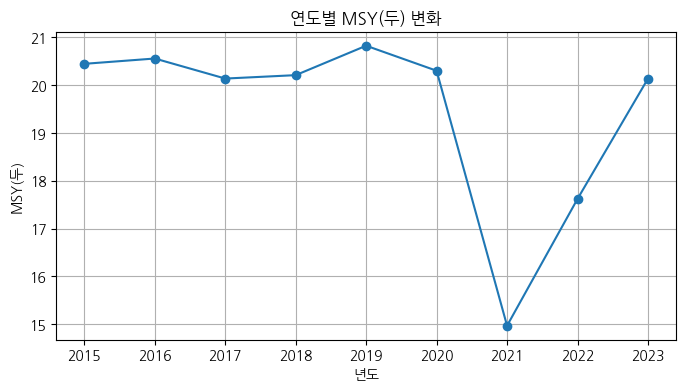

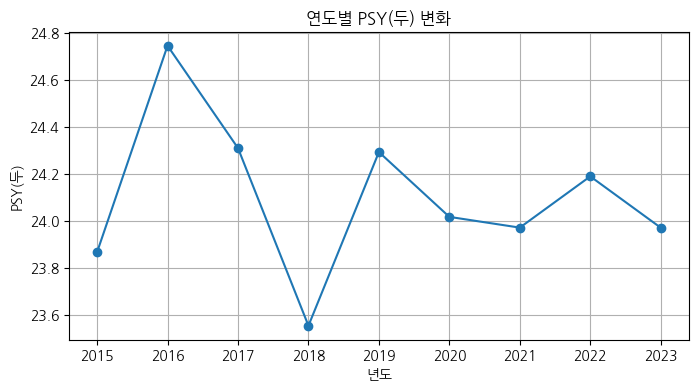

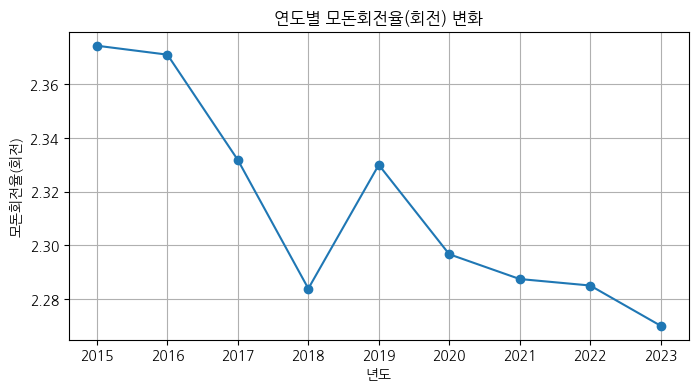

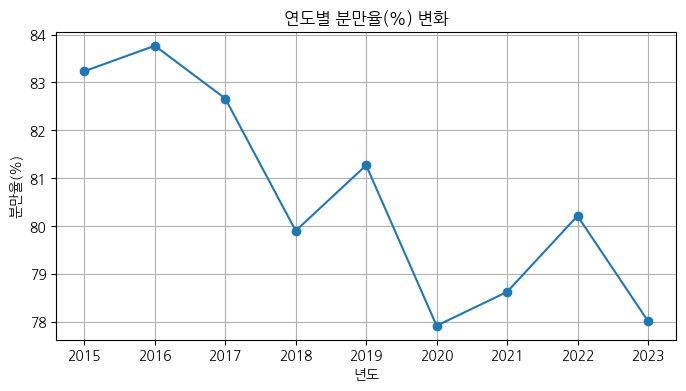

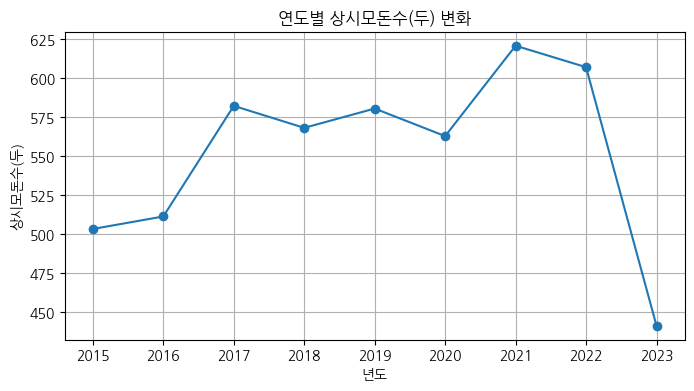

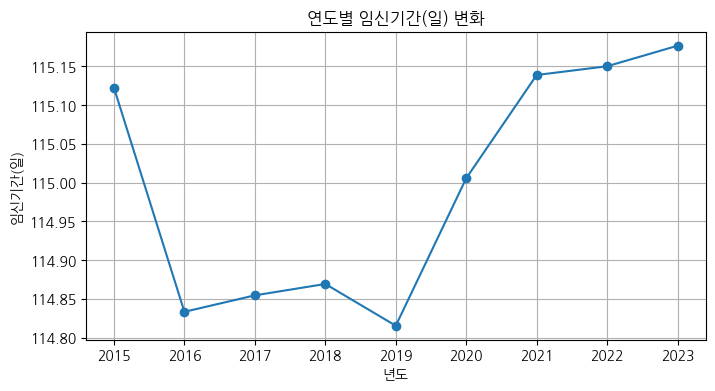

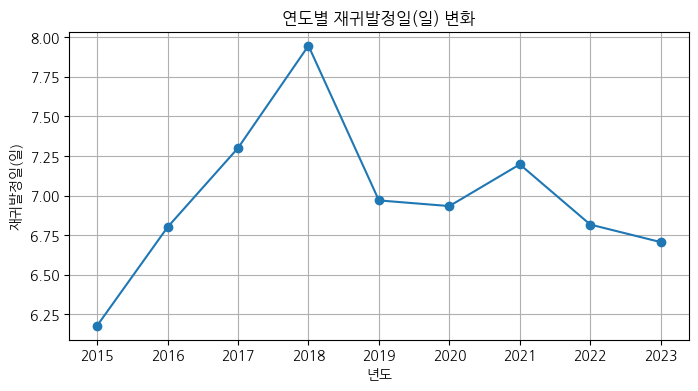

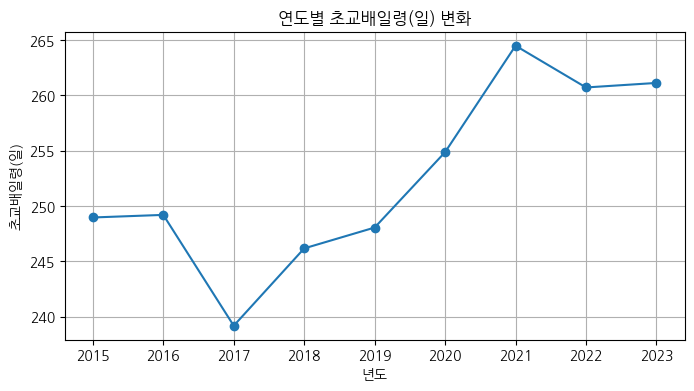

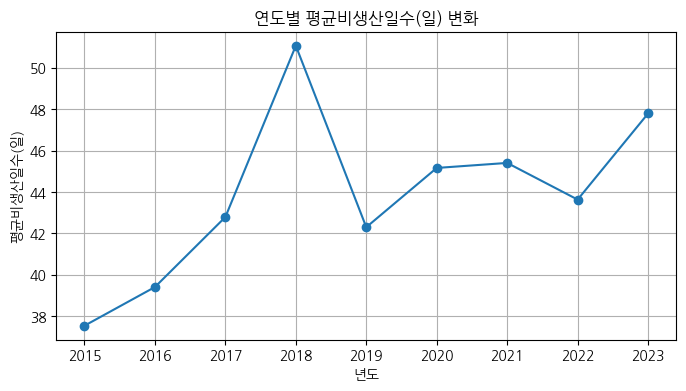

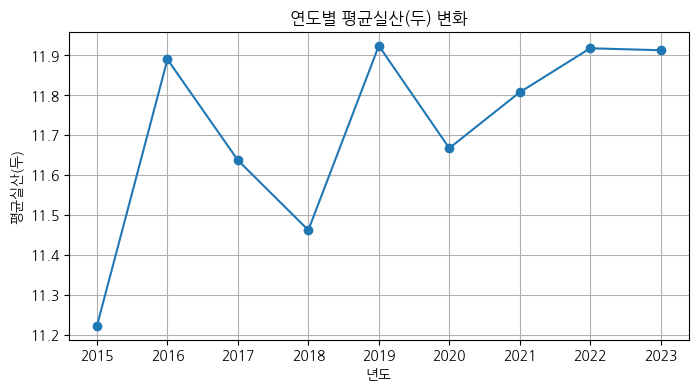

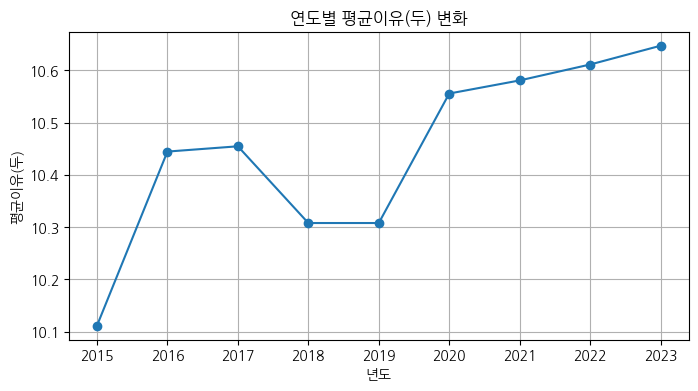

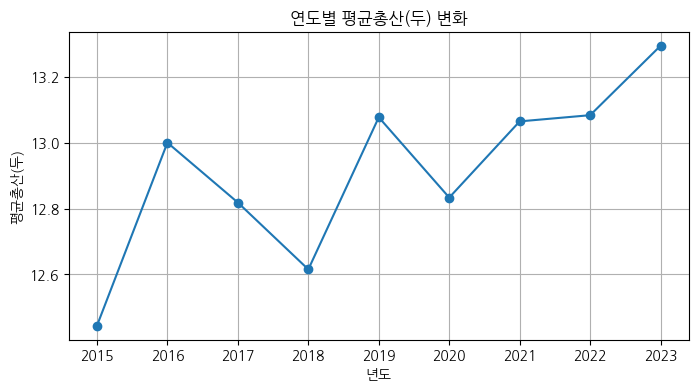

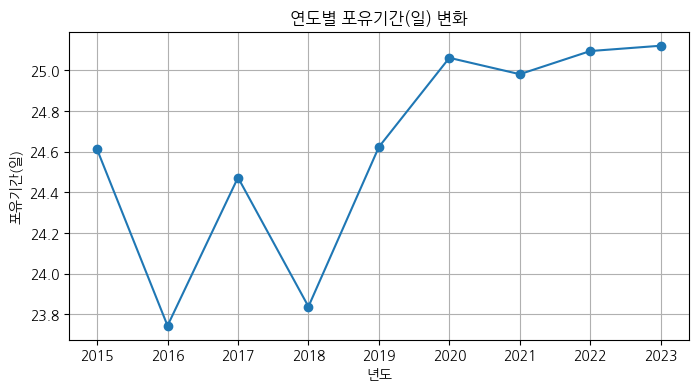

In [111]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

for col in df_filtered.columns:
    plt.figure(figsize=(8,4))
    plt.plot(df_filtered.index, df_filtered[col], marker='o')
    plt.title(f"연도별 {col} 변화")
    plt.xlabel("년도")
    plt.ylabel(col)
    plt.xlim()
    plt.grid()
    plt.show()



In [113]:
corr_matrix = df_filtered.corr()
corr_matrix

,MSY(두),PSY(두),모돈회전율(회전),분만율(%),상시모돈수(두),임신기간(일),재귀발정일(일),초교배일령(일),평균비생산일수(일),평균실산(두),평균이유(두),평균총산(두),포유기간(일)
MSY(두),1.000000,0.141279,0.434869,0.389089,-0.563548,-0.543480,-0.128963,-0.686992,-0.178857,-0.250370,-0.477586,-0.303284,-0.424156
PSY(두),0.141279,1.000000,0.516221,0.524776,-0.015837,-0.385502,-0.305432,-0.162552,-0.608406,0.571448,0.190729,0.414566,-0.193220
모돈회전율(회전),0.434869,0.516221,1.000000,0.905207,-0.196309,-0.410082,-0.468310,-0.577609,-0.880024,-0.346168,-0.678934,-0.459798,-0.504369
분만율(%),0.389089,0.524776,0.905207,1.000000,-0.085271,-0.488652,-0.258880,-0.681393,-0.757059,-0.281467,-0.636766,-0.418330,-0.630964
상시모돈수(두),-0.563548,-0.015837,-0.196309,-0.085271,1.000000,-0.179634,0.485211,0.005852,0.106566,0.102757,0.095873,-0.058044,0.080861
임신기간(일),-0.543480,-0.385502,-0.410082,-0.488652,-0.179634,1.000000,-0.476584,0.799062,0.070329,-0.018899,0.376274,0.198544,0.746400
재귀발정일(일),-0.128963,-0.305432,-0.468310,-0.258880,0.485211,-0.476584,1.000000,-0.253197,0.740672,0.028581,0.119848,-0.054275,-0.392534
초교배일령(일),-0.686992,-0.162552,-0.577609,-0.681393,0.005852,0.799062,-0.253197,1.000000,0.242923,0.445719,0.643267,0.577130,0.671760
평균비생산일수(일),-0.178857,-0.608406,-0.880024,-0.757059,0.106566,0.070329,0.740672,0.242923,1.000000,0.134613,0.421174,0.215551,0.085290
평균실산(두),-0.250370,0.571448,-0.346168,-0.281467,0.102757,-0.018899,0.028581,0.445719,0.134613,1.000000,0.727218,0.952515,0.261956


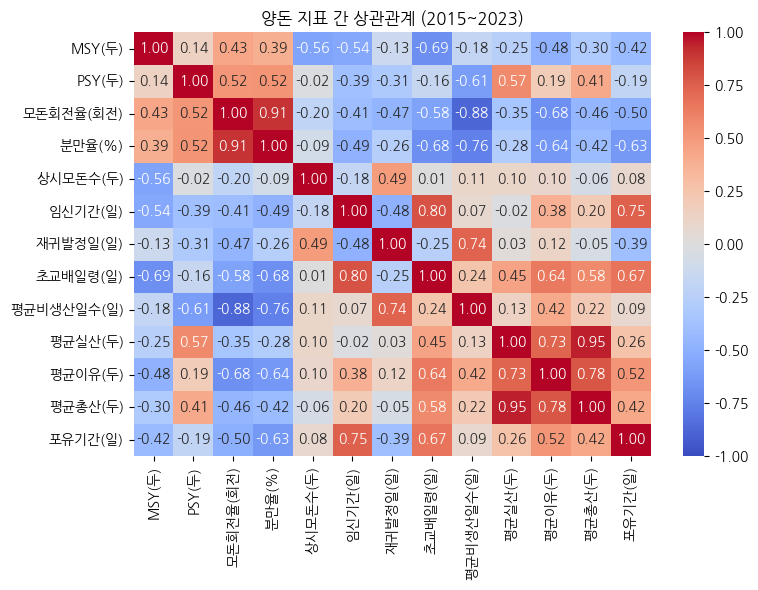

In [115]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title("양돈 지표 간 상관관계 (2015~2023)")
plt.tight_layout()
plt.show()

In [178]:
df_asf = pd.read_csv('./data/asf_status.csv')
df_asf.columns = ['번호','주소','발생일','감염돼지수']
df_asf = df_asf[['발생일','감염돼지수']]
df_asf

,발생일,감염돼지수
0,‘19.9.16.,"돼지 2,369두"
1,‘19.9.17.,"돼지 4,638두"
2,‘19.9.23.,"돼지 2,119두"
3,‘19.9.23.,"돼지 2,273두"
4,‘19.9.23.,돼지 388두
5,‘19.9.25.,돼지 869두
6,‘19.9.25.,돼지 2두
7,‘19.9.26.,"돼지 1,125두"
8,‘19.9.26.,"돼지 2,123두"
9,‘19.10.1.,"돼지 2,661두"


In [179]:
df_asf['연도'] = df_asf['발생일'].str.slice(1, 3).astype(int) + 2000
df_asf

,발생일,감염돼지수,연도
0,‘19.9.16.,"돼지 2,369두",2019
1,‘19.9.17.,"돼지 4,638두",2019
2,‘19.9.23.,"돼지 2,119두",2019
3,‘19.9.23.,"돼지 2,273두",2019
4,‘19.9.23.,돼지 388두,2019
5,‘19.9.25.,돼지 869두,2019
6,‘19.9.25.,돼지 2두,2019
7,‘19.9.26.,"돼지 1,125두",2019
8,‘19.9.26.,"돼지 2,123두",2019
9,‘19.10.1.,"돼지 2,661두",2019


In [180]:
df_asf['감염돼지수'] = df_asf['감염돼지수'].str.extract(r'([\d,]+)')[0].str.replace(',', '').astype(int)
df_asf

,발생일,감염돼지수,연도
0,‘19.9.16.,2369,2019
1,‘19.9.17.,4638,2019
2,‘19.9.23.,2119,2019
3,‘19.9.23.,2273,2019
4,‘19.9.23.,388,2019
5,‘19.9.25.,869,2019
6,‘19.9.25.,2,2019
7,‘19.9.26.,1125,2019
8,‘19.9.26.,2123,2019
9,‘19.10.1.,2661,2019


In [181]:
df_asf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   발생일     20 non-null     object
 1   감염돼지수   20 non-null     int64 
 2   연도      20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


In [183]:
df_asf_filtered = pd.pivot_table(df_asf[['감염돼지수','연도']], index='연도', aggfunc='sum')
df_asf_filtered

,감염돼지수
연도,
2019,28014
2020,1746
2021,6873


In [2]:
import mysql.connector

conn = mysql.connector.connect(
    host = 'database-1.cba44miw26by.ap-northeast-2.rds.amazonaws.com',
    port = 3306,
    user = 'kjy',
    password = '0000',
    database = 'pig'
)

cursor = conn.cursor(buffered=True)

In [10]:
import pandas as pd

cols = ['개체구별번호', '총산자수', '미라', '사산', '분만일']

cursor.execute('select sow_id, total_born, mummy, still_born, farrow_dt from pigmom_sow')
result = cursor.fetchall()
df_sad = pd.DataFrame(result)
df_sad.columns = cols
df_sad


,개체구별번호,총산자수,미라,사산,분만일
0,1,18,1,3,2015-05-09
1,1,15,1,0,2015-09-22
2,1,15,3,1,2016-02-13
3,1,18,3,2,2016-07-13
4,1,17,1,5,2016-12-08
...,...,...,...,...,...
117826,119,6,0,0,2024-11-23
117827,120,12,0,5,2024-11-24
117828,121,15,0,1,2022-11-17
117829,122,26,0,7,2023-11-16


In [18]:
df_sad['분만연도'] = df_sad['분만일'].astype(str).str.split('-').str[0]
df_sad['분만월'] = df_sad['분만일'].astype(str).str.split('-').str[1]
df_sad.head()

,개체구별번호,총산자수,미라,사산,분만일,분만연도,분만월
0,1,18,1,3,2015-05-09,2015,05
1,1,15,1,0,2015-09-22,2015,09
2,1,15,3,1,2016-02-13,2016,02
3,1,18,3,2,2016-07-13,2016,07
4,1,17,1,5,2016-12-08,2016,12


In [62]:
# 연도-월별로 집계
df_grouped = df_sad.groupby(['분만연도', '분만월'])[['총산자수', '미라', '사산']].sum().reset_index()

# 연도-월을 문자열로 합쳐서 x축 라벨로 사용
df_grouped['연월'] = df_grouped['분만연도'].astype(str) + '-' + df_grouped['분만월'].str.zfill(2)


In [21]:
df_grouped

,분만연도,분만월,총산자수,미라,사산,연월
0,2015,01,1612,59,106,2015-01
1,2015,02,1322,58,91,2015-02
2,2015,03,1963,101,153,2015-03
3,2015,04,1774,77,133,2015-04
4,2015,05,2069,110,140,2015-05
...,...,...,...,...,...,...
105,2024,03,116,0,10,2024-03
106,2024,09,79,0,3,2024-09
107,2024,10,102,0,24,2024-10
108,2024,11,329,0,48,2024-11


In [29]:
df_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   분만연도    110 non-null    object
 1   분만월     110 non-null    object
 2   총산자수    110 non-null    int64 
 3   미라      110 non-null    int64 
 4   사산      110 non-null    int64 
 5   연월      110 non-null    object
dtypes: int64(3), object(3)
memory usage: 5.3+ KB


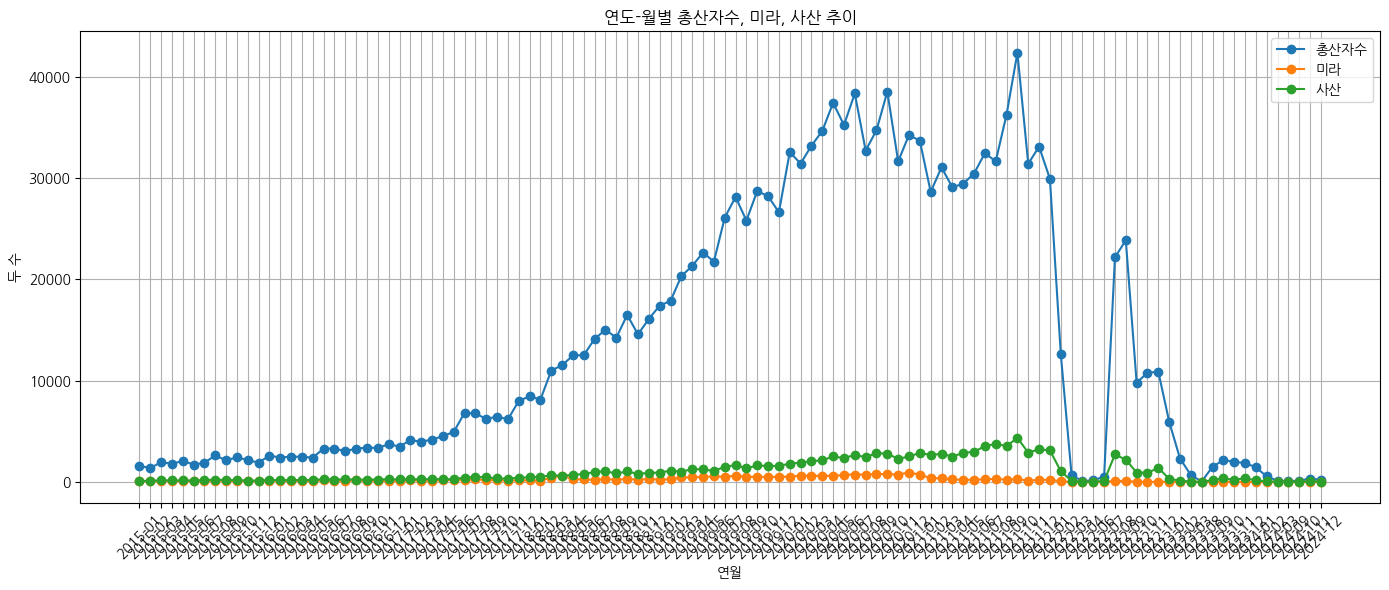

In [26]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.figure(figsize=(14, 6))

plt.plot(df_grouped['연월'], df_grouped['총산자수'], marker='o', label='총산자수')
plt.plot(df_grouped['연월'], df_grouped['미라'], marker='o', label='미라')
plt.plot(df_grouped['연월'], df_grouped['사산'], marker='o', label='사산')

plt.title("연도-월별 총산자수, 미라, 사산 추이")
plt.xlabel("연월")
plt.ylabel("두 수")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


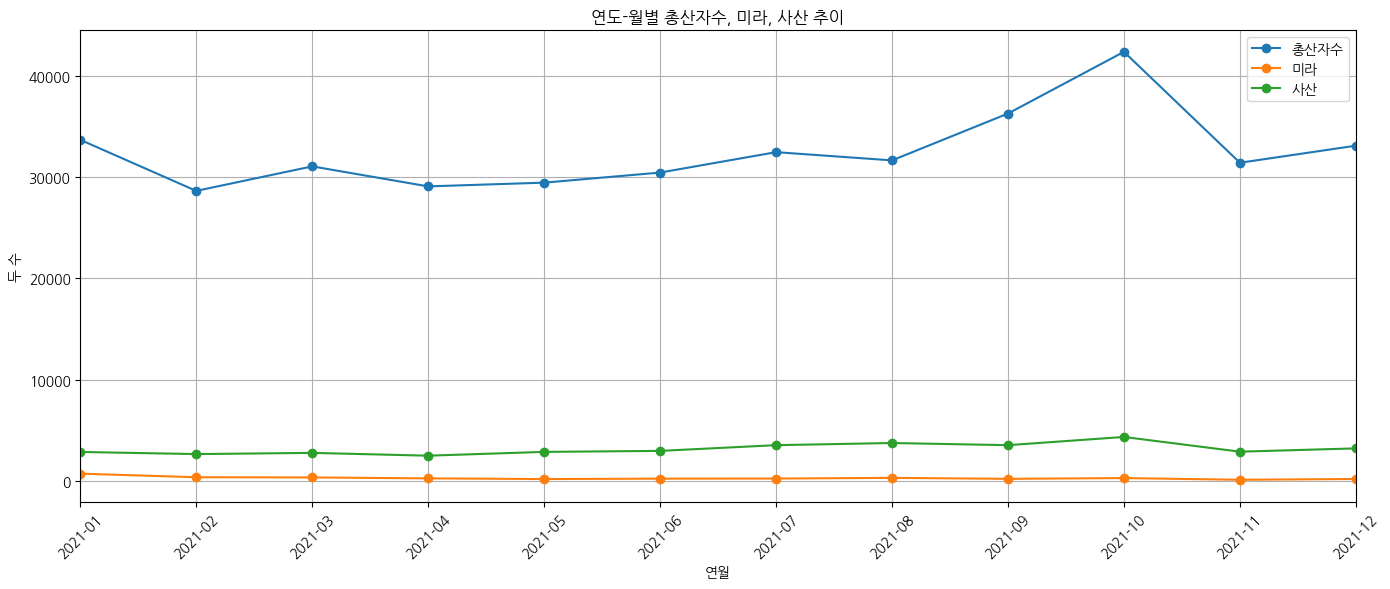

In [32]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.figure(figsize=(14, 6))

plt.plot(df_grouped['연월'], df_grouped['총산자수'], marker='o', label='총산자수')
plt.plot(df_grouped['연월'], df_grouped['미라'], marker='o', label='미라')
plt.plot(df_grouped['연월'], df_grouped['사산'], marker='o', label='사산')

plt.title("연도-월별 총산자수, 미라, 사산 추이")
plt.xlabel("연월")
plt.ylabel("두 수")
plt.xticks(rotation=45)
plt.xlim('2021-01','2021-12')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


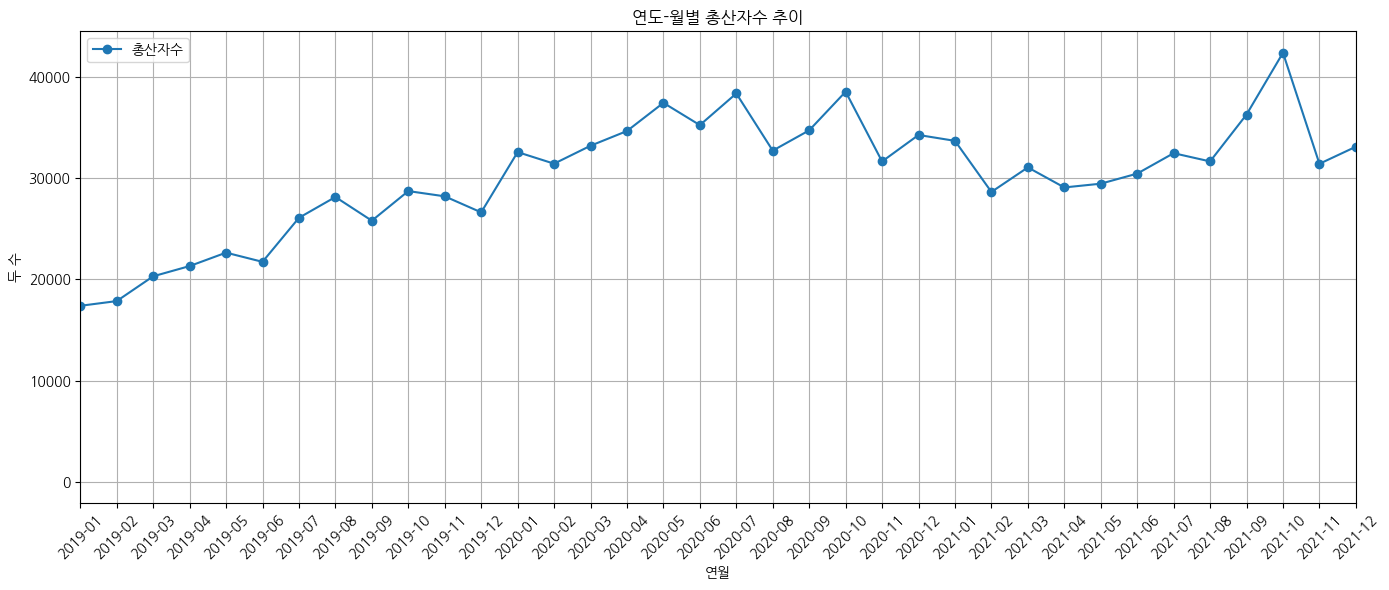

In [34]:
plt.figure(figsize=(14, 6))

plt.plot(df_grouped['연월'], df_grouped['총산자수'], marker='o', label='총산자수')

plt.title("연도-월별 총산자수 추이")
plt.xlabel("연월")
plt.ylabel("두 수")
plt.xticks(rotation=45)
plt.xlim('2019-01','2021-12')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [38]:
import mysql.connector

conn = mysql.connector.connect(
    host = 'database-1.cba44miw26by.ap-northeast-2.rds.amazonaws.com',
    port = 3306,
    user = 'kjy',
    password = '0000',
    database = 'pig'
)

cursor = conn.cursor(buffered=True)

In [39]:
import pandas as pd

cols_feed = ['연도', '원화가격']

cursor.execute('select year, krw_based_price from feed_price')
result = cursor.fetchall()
df_feed = pd.DataFrame(result)
df_feed.columns = cols_feed
df_feed


,연도,원화가격
0,2015,4256.37
1,2016,4153.36
2,2017,4058.97
3,2018,4046.69
4,2019,4462.73
5,2020,4281.31
6,2021,6657.04
7,2022,8958.32
8,2023,7357.95
9,2024,5768.37


/tmp/ipykernel_19523/97480277.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_grouped['연월'], rotation=45)


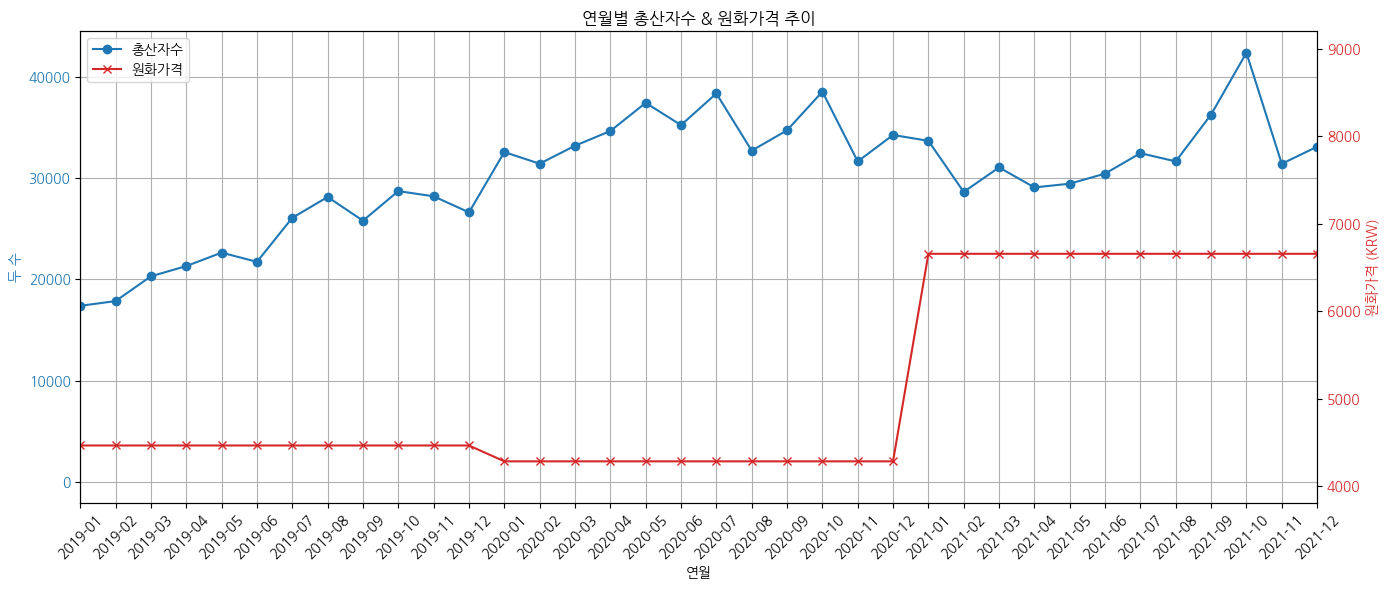

In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 6))

# 첫 번째 y축: 총산자수
ax1.plot(df_grouped['연월'], df_grouped['총산자수'], color='tab:blue', marker='o', label='총산자수')
ax1.set_xlabel('연월')
ax1.set_ylabel('두 수', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xlim(['2019-01', '2021-12'])
ax1.set_xticklabels(df_grouped['연월'], rotation=45)
ax1.grid(True)

# 두 번째 y축: 원화가격
ax2 = ax1.twinx()

df_grouped['연도'] = df_grouped['연월'].str[:4].astype(int)

# 연도별 평균 원화가격 매핑
df_grouped = df_grouped.merge(df_feed, on='연도', how='left')

ax2.plot(df_grouped['연월'], df_grouped['원화가격'], color='tab:red', marker='x', label='원화가격')
ax2.set_ylabel('원화가격 (KRW)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# 범례 합치기
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title("연월별 총산자수 & 원화가격 추이")
plt.tight_layout()
plt.show()


In [64]:
import yfinance as yf
import pandas as pd

# 데이터 다운로드
df_price = yf.download("ZC=F", start="2015-01-01", end="2024-12-31")

# 멀티 인덱스 컬럼을 평탄화
df_price.columns = df_price.columns.get_level_values(0)

# 월별 평균 계산
df_price_monthly = df_price.resample('M').mean()
df_price_monthly['연월'] = df_price_monthly.index.strftime('%Y-%m')
df_price_monthly = df_price_monthly.reset_index(drop=True)
df_price_monthly = df_price_monthly[['연월', 'Close']].rename(columns={'Close': '옥수수가격'})



[*********************100%***********************]  1 of 1 completed
/tmp/ipykernel_19523/2830743198.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_price_monthly = df_price.resample('M').mean()


In [65]:
df_price_monthly

Price,연월,옥수수가격
0,2015-01,388.100000
1,2015-02,383.684211
2,2015-03,382.943182
3,2015-04,373.964286
4,2015-05,359.237500
...,...,...
115,2024-08,376.670455
116,2024-09,400.600000
117,2024-10,416.119565
118,2024-11,424.237500


In [66]:
df_grouped = df_grouped.reset_index()
df_merged = df_grouped.merge(df_price_monthly, on='연월', how='left')


In [67]:
df_merged

,index,분만연도,분만월,총산자수,미라,사산,연월,연도,원화가격,옥수수가격
0,0,2015,01,1612,59,106,2015-01,2015,4256.37,388.100000
1,1,2015,02,1322,58,91,2015-02,2015,4256.37,383.684211
2,2,2015,03,1963,101,153,2015-03,2015,4256.37,382.943182
3,3,2015,04,1774,77,133,2015-04,2015,4256.37,373.964286
4,4,2015,05,2069,110,140,2015-05,2015,4256.37,359.237500
...,...,...,...,...,...,...,...,...,...,...
105,105,2024,03,116,0,10,2024-03,2024,5768.37,429.500000
106,106,2024,09,79,0,3,2024-09,2024,5768.37,400.600000
107,107,2024,10,102,0,24,2024-10,2024,5768.37,416.119565
108,108,2024,11,329,0,48,2024-11,2024,5768.37,424.237500


/tmp/ipykernel_19523/856927314.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_grouped['연월'], rotation=45)


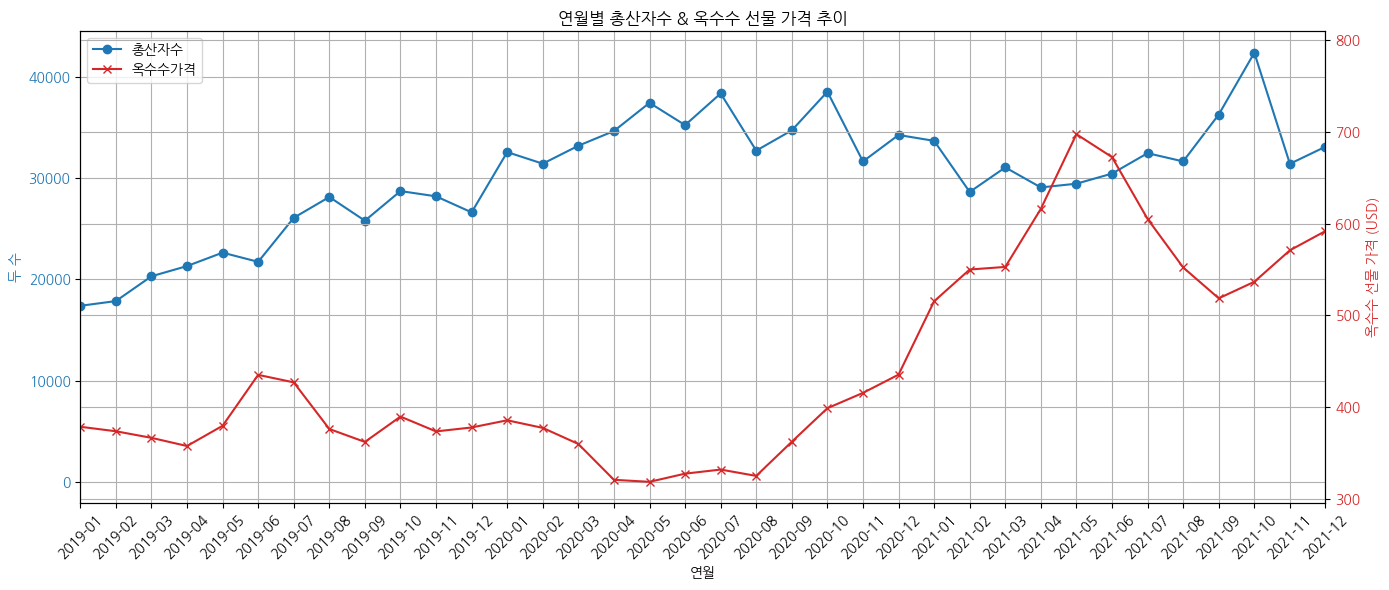

In [ ]:
fig, ax1 = plt.subplots(figsize=(14, 6))

# 총산자수 (왼쪽 y축)
ax1.plot(df_grouped['연월'], df_grouped['총산자수'], color='tab:blue', marker='o', label='총산자수')
ax1.set_xlabel('연월')
ax1.set_ylabel('두 수', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xlim(['2019-01', '2021-12'])
ax1.set_xticklabels(df_grouped['연월'], rotation=45)
ax1.grid(True)

# 옥수수 가격 추이 (오른쪽 y축)
ax2 = ax1.twinx()
ax2.plot(df_merged['연월'], df_merged['옥수수가격'], color='tab:red', marker='x', label='옥수수가격')
ax2.set_ylabel('옥수수 선물 가격 (USD)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# 범례
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title("연월별 총산자수 & 옥수수 선물 가격 추이")
plt.tight_layout()
plt.grid(True)
plt.show()


In [78]:
df_filtered = df_merged[(df_merged['연월'] >= '2019-01') & (df_merged['연월'] <= '2021-12')]
df_filtered.head()

,index,분만연도,분만월,총산자수,미라,사산,연월,연도,원화가격,옥수수가격
48,48,2019,01,17394,225,909,2019-01,2019,4462.73,378.690476
49,49,2019,02,17860,249,1106,2019-02,2019,4462.73,373.789474
50,50,2019,03,20305,432,1008,2019-03,2019,4462.73,366.630952
51,51,2019,04,21314,437,1245,2019-04,2019,4462.73,357.702381
52,52,2019,05,22638,490,1242,2019-05,2019,4462.73,379.761364


In [81]:
df_filtered['옥수수가격_역수'] = 1 / df_filtered['옥수수가격']


/tmp/ipykernel_19523/3518085934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['옥수수가격_역수'] = 1 / df_filtered['옥수수가격']


In [82]:
df_filtered.head()

,index,분만연도,분만월,총산자수,미라,사산,연월,연도,원화가격,옥수수가격,옥수수가격_역수
48,48,2019,01,17394,225,909,2019-01,2019,4462.73,378.690476,0.002641
49,49,2019,02,17860,249,1106,2019-02,2019,4462.73,373.789474,0.002675
50,50,2019,03,20305,432,1008,2019-03,2019,4462.73,366.630952,0.002728
51,51,2019,04,21314,437,1245,2019-04,2019,4462.73,357.702381,0.002796
52,52,2019,05,22638,490,1242,2019-05,2019,4462.73,379.761364,0.002633


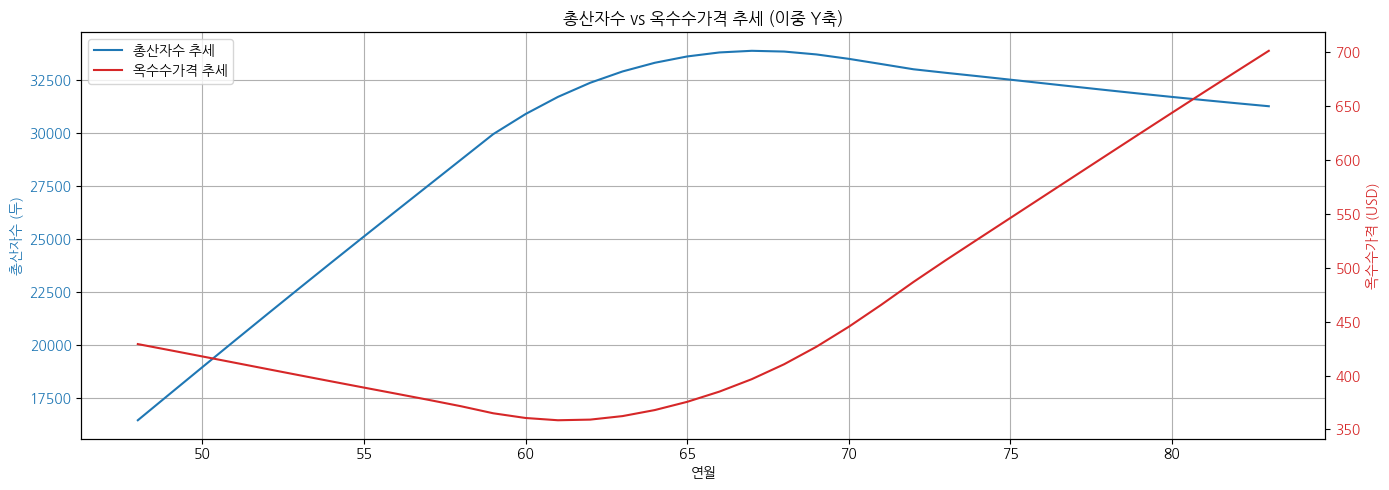

In [86]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(14, 5))

# 왼쪽 y축 - 총산자수 추세
ax1.plot(res1.trend, label='총산자수 추세', color='tab:blue')
ax1.set_ylabel('총산자수 (두)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xlabel('연월')
ax1.grid(True)

# 오른쪽 y축 - 옥수수가격 추세
ax2 = ax1.twinx()
ax2.plot(res2.trend, label='옥수수가격 추세', color='tab:red')
ax2.set_ylabel('옥수수가격 (USD)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# 범례 (양쪽 그래프의 라벨 합쳐서 표시)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('총산자수 vs 옥수수가격 추세 (이중 Y축)')
plt.tight_layout()
plt.show()


/tmp/ipykernel_19523/3631767951.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df_grouped['연월'], rotation=45)


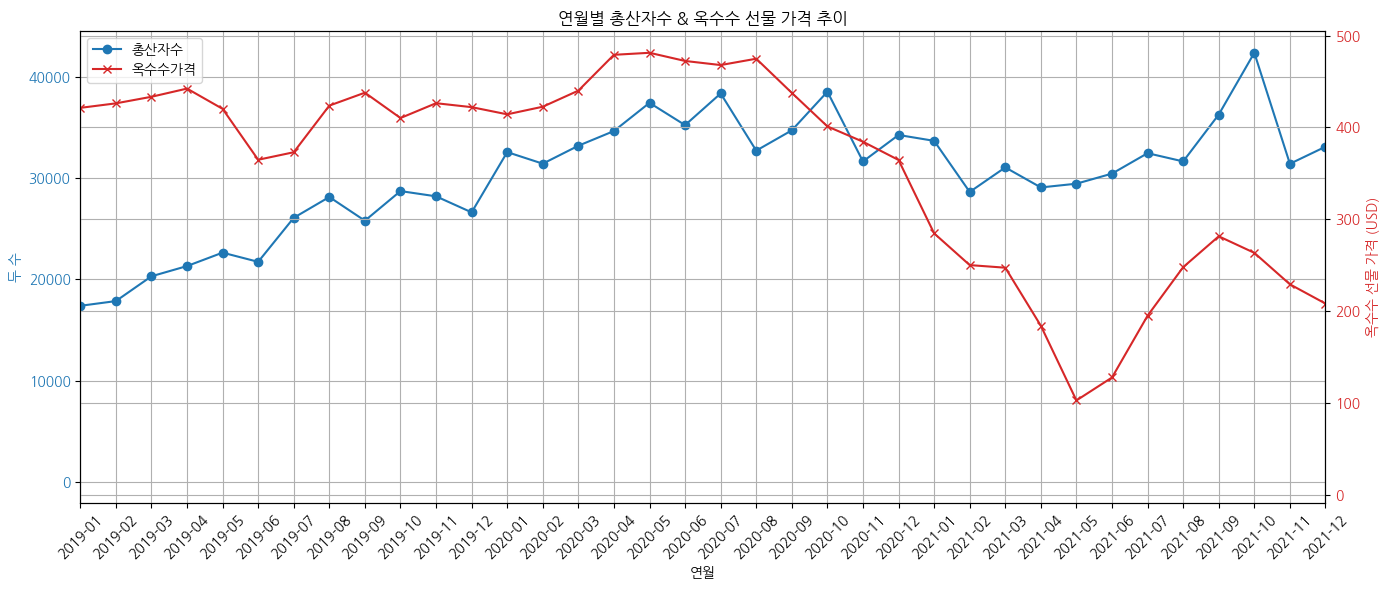

In [94]:
fig, ax1 = plt.subplots(figsize=(14, 6))

# 총산자수 (왼쪽 y축)
ax1.plot(df_grouped['연월'], df_grouped['총산자수'], color='tab:blue', marker='o', label='총산자수')
ax1.set_xlabel('연월')
ax1.set_ylabel('두 수', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xlim(['2019-01', '2021-12'])
ax1.set_xticklabels(df_grouped['연월'], rotation=45)
ax1.grid(True)

# 옥수수 가격 추이 (오른쪽 y축)
ax2 = ax1.twinx()
ax2.plot(df_merged['연월'], (800-df_merged['옥수수가격']), color='tab:red', marker='x', label='옥수수가격')
ax2.set_ylabel('옥수수 선물 가격 (USD)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# 범례
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title("연월별 총산자수 & 옥수수 선물 가격 추이")
plt.tight_layout()
plt.grid(True)
plt.show()


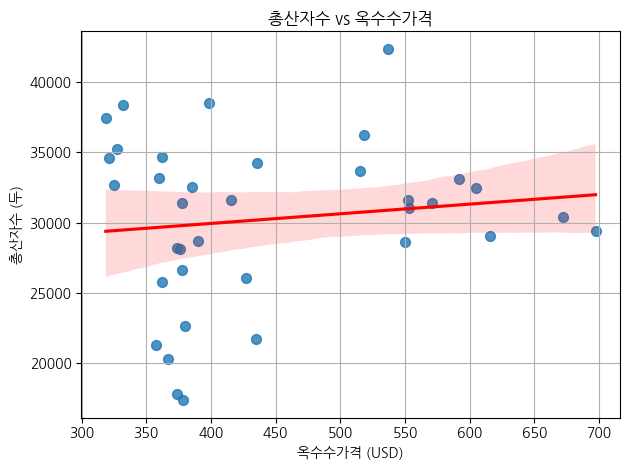

In [95]:
sns.regplot(data=df_filtered, x='옥수수가격', y='총산자수',
            scatter_kws={'s': 50}, line_kws={'color': 'red'})

plt.title("총산자수 vs 옥수수가격")
plt.xlabel("옥수수가격 (USD)")
plt.ylabel("총산자수 (두)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [97]:
df_filtered['옥수수가격_보정'] = 800-df_filtered['옥수수가격']

/tmp/ipykernel_19523/3954035499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['옥수수가격_보정'] = 800-df_filtered['옥수수가격']
